In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras

In [3]:
print(keras.__version__)

2.4.3


In [4]:
df = pd.read_csv('Datasets/car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

Here 'Selling_Price' is our Dependent Vriable/Feature

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
len(df.columns)

9

In [10]:
df.columns[5:10]

Index(['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], dtype='object')

In [11]:
def unique_n(data):
    for i in df.columns[5:10]:
        print(f"Column name is:  {i} and its unique values:  {df[i].unique()}")

In [12]:
unique_n(df)

Column name is:  Fuel_Type and its unique values:  ['Petrol' 'Diesel' 'CNG']
Column name is:  Seller_Type and its unique values:  ['Dealer' 'Individual']
Column name is:  Transmission and its unique values:  ['Manual' 'Automatic']
Column name is:  Owner and its unique values:  [0 1 3]


In [13]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [17]:
df.drop('Car_Name',axis='columns', inplace=True)

In [18]:
df.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [19]:
df['Current Year'] = 2021

In [20]:
df.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021


In [21]:
df['No_Year'] = df['Current Year'] - df['Year']

In [22]:
df.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4


In [24]:
df.drop(['Year','Current Year'],axis='columns',inplace=True)

df.drop(['Year','Current Year'],axis=1,inplace=True)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Changing categorical features into numerical values by using 'pd.get_dummies'

In [26]:
df = pd.get_dummies(df,drop_first=True)

In [27]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [28]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [29]:
import seaborn as sns

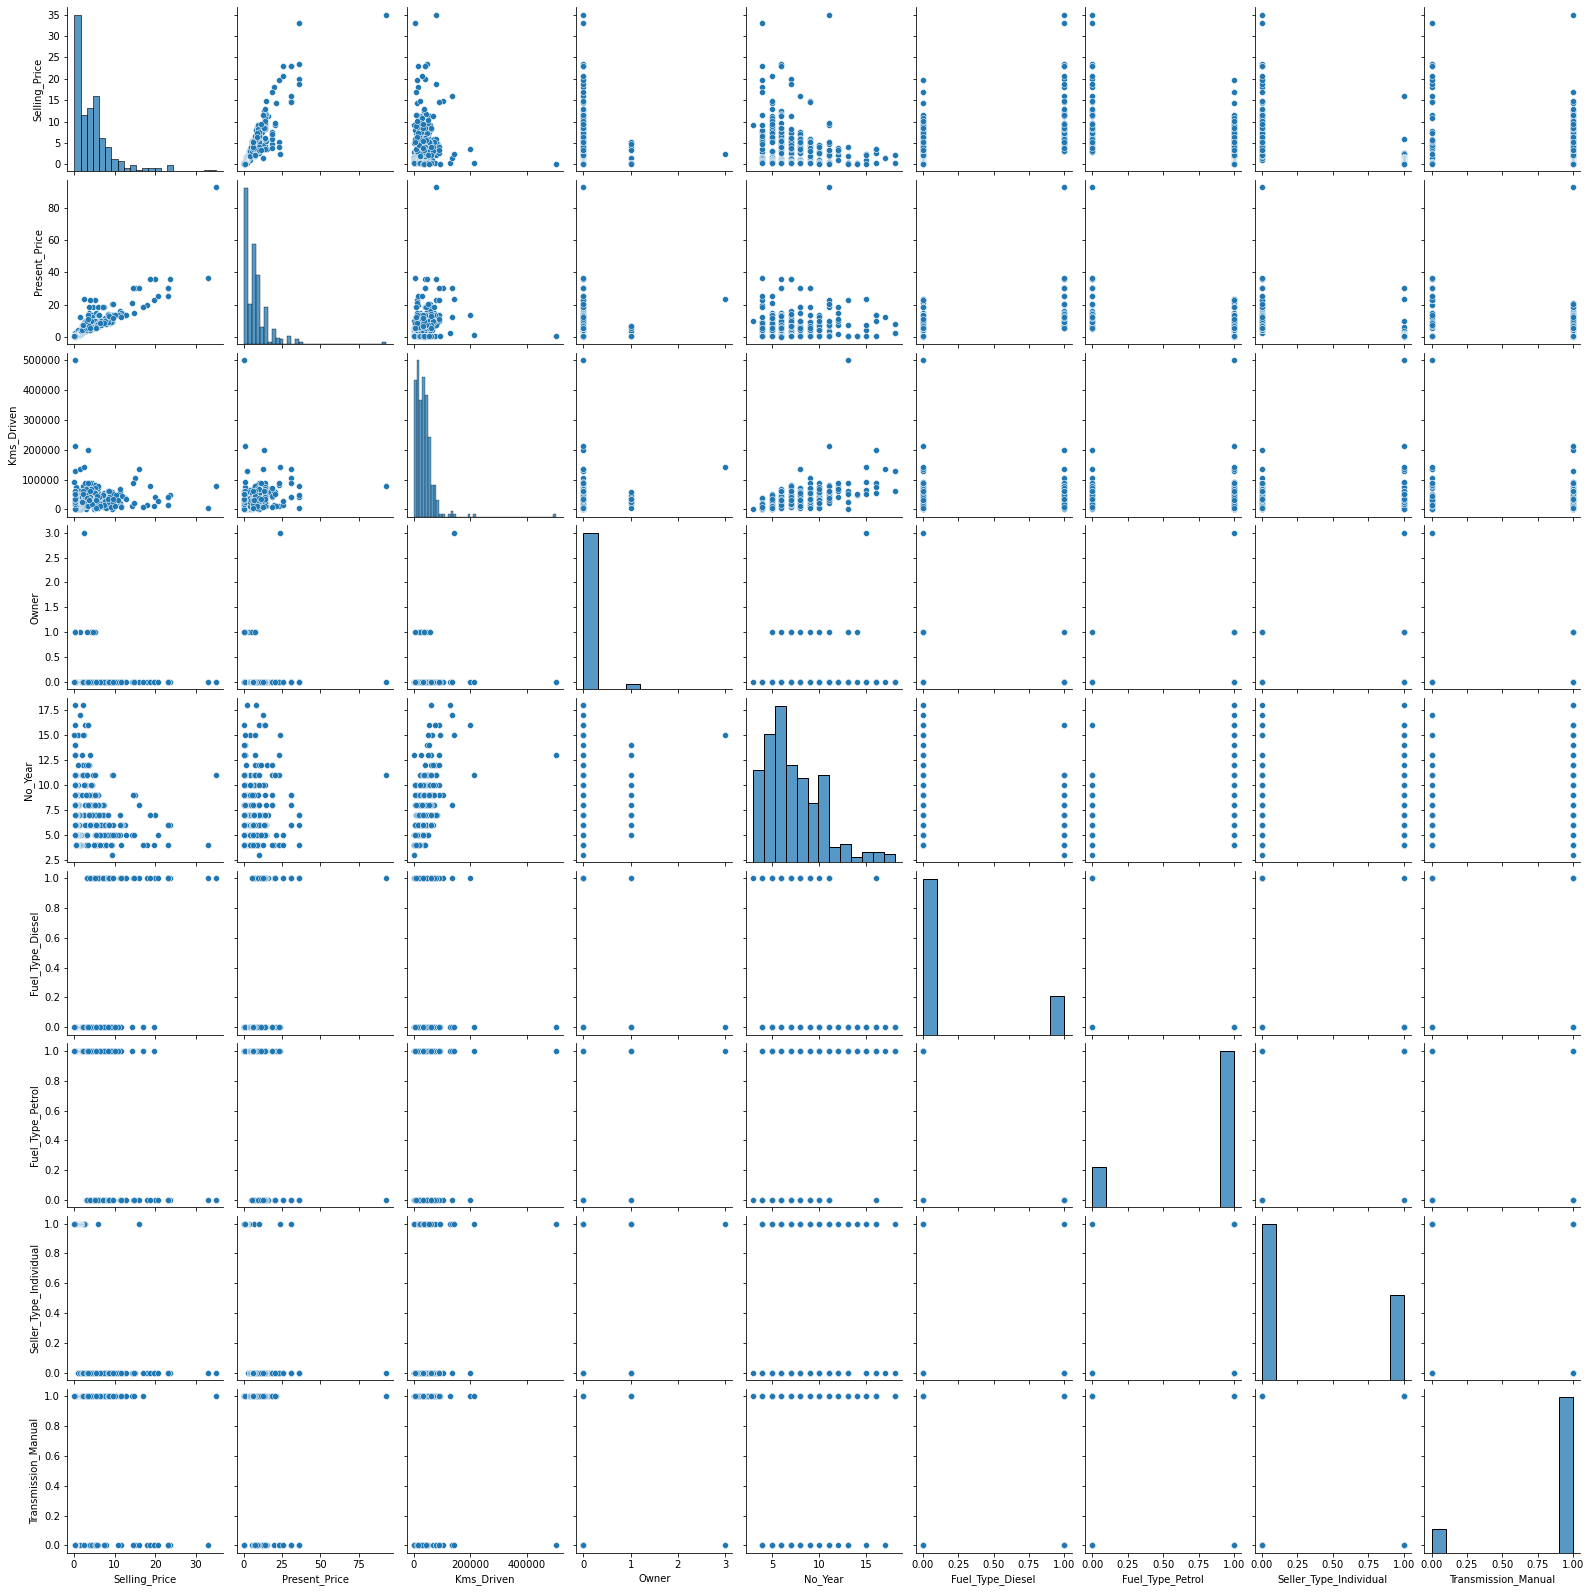

In [30]:
sns.pairplot(df)

<AxesSubplot:>

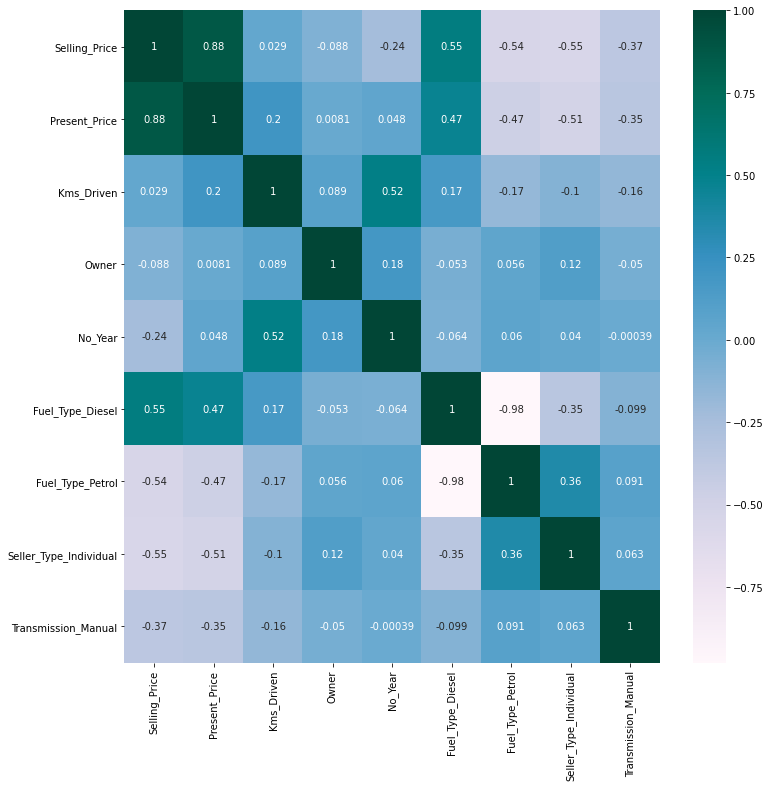

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn')

In [34]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [35]:
len(df.columns)

9

## Creating Independent & Dependent Features

In [39]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [37]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [40]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## Feature Importance

In [41]:
from sklearn.ensemble import ExtraTreesRegressor

In [42]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [43]:
print(model.feature_importances_)

[3.66370486e-01 3.94895694e-02 3.31020812e-04 7.82695822e-02
 2.35021086e-01 8.01472316e-03 1.29924449e-01 1.42579084e-01]


In [44]:
f_imp = pd.Series(data = model.feature_importances_, index=X.columns)
f_imp

Present_Price             0.366370
Kms_Driven                0.039490
Owner                     0.000331
No_Year                   0.078270
Fuel_Type_Diesel          0.235021
Fuel_Type_Petrol          0.008015
Seller_Type_Individual    0.129924
Transmission_Manual       0.142579
dtype: float64

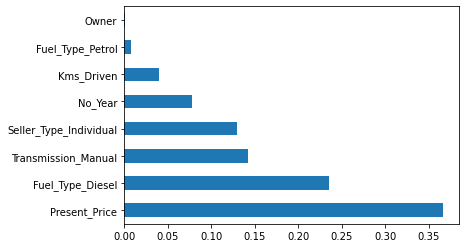

In [47]:
f_imp.nlargest(8).plot(kind='barh')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((240, 8), (61, 8))

In [51]:
y_train.shape, y_test.shape

((240,), (61,))

Random Forest makes use of Decison Trees and in DT we do not need to scale the features.

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()

### Hyper-Parameters Tuning

Randomized Search CV

- Helps us to find out a set of best HyperParameters

In [54]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [55]:
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,50,100]
min_samples_leaf = [1,2,5,10,20]

In [56]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
              }

In [57]:
from sklearn.model_selection import RandomizedSearchCV

For Hyper-Paramters Tuning - there are 2 options

- RandomizedSearchCV
- GridSearchCV

Usually, RandomizedSearchCV is preferred over GridSearchCv as it is faster than the later

In [58]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 50, 100], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [59]:
rf_random = RandomizedSearchCV(estimator=rf,scoring='neg_mean_squared_error',param_distributions=random_grid,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)


In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_s

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=500)

n_jobs is to decide how many cores of your device you want to use

If n_jobs = 1, then all cores of your devicxe will be selected

verbose is used to show all the details while training is happening

In [62]:
predictions = rf_random.predict(X_test)

In [63]:
predictions

array([ 0.38086255, 11.2795755 ,  4.79402115,  0.24502422,  7.36903467,
        6.5395312 ,  1.09461682,  0.59994698,  0.4291291 ,  6.18494281,
        7.8194317 ,  0.98786942,  7.9957335 ,  0.44336674,  5.17474593,
        2.74126079,  1.10787315, 12.05013951,  0.44367514,  1.30706728,
        0.32386071,  7.62118162,  4.7813655 ,  2.70790889,  0.51486314,
        3.77807214,  5.26308542,  3.21950336,  1.20309081,  1.17194919,
        0.38605801,  9.46957756,  0.44900601,  2.90011307,  7.76375328,
        4.46947657,  6.19163794,  6.2392865 ,  2.64743245,  6.65514618,
        5.45102277,  4.27421736,  4.93197083,  0.51476498,  6.38337733,
        0.78879499,  9.07317057,  8.02657499,  2.86455953,  3.71632923,
        5.13353659,  1.23020332, 21.13090196, 19.5345585 ,  6.74219532,
       10.56010356,  5.06195797,  8.71687577,  2.96794614,  7.08558709,
        0.25623076])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

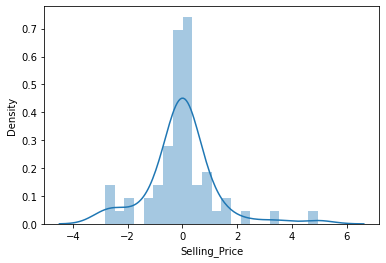

In [64]:
sns.distplot(y_test-predictions)

Above distplot is following Normal Distribution shape, this clearly means that our model is predicting very well.

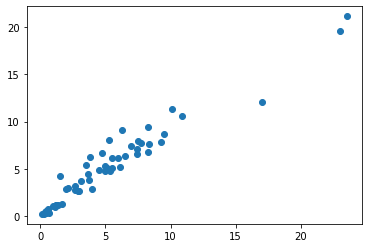

In [65]:
plt.scatter(y_test,predictions)

In [66]:
import pickle

open a file, where we want to store data

In [69]:
file = open('random_forest_model.pkl','wb')

# wb - write Bytes

Dumping info to that file

In [70]:
pickle.dump(rf_random,file)

In [ ]:
cmd